# Explore here

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
import pickle

In [2]:

url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"

data = pd.read_csv(url, sep=",")
#datos =pd.set_option('display.max_colums',None)

# Mostrar las primeras filas del DataFrame
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
columns_with_nan = data.columns[data.isna().any()].tolist()
print(f"Hay {len(columns_with_nan)} columnas con valores nulos")

Hay 0 columnas con valores nulos


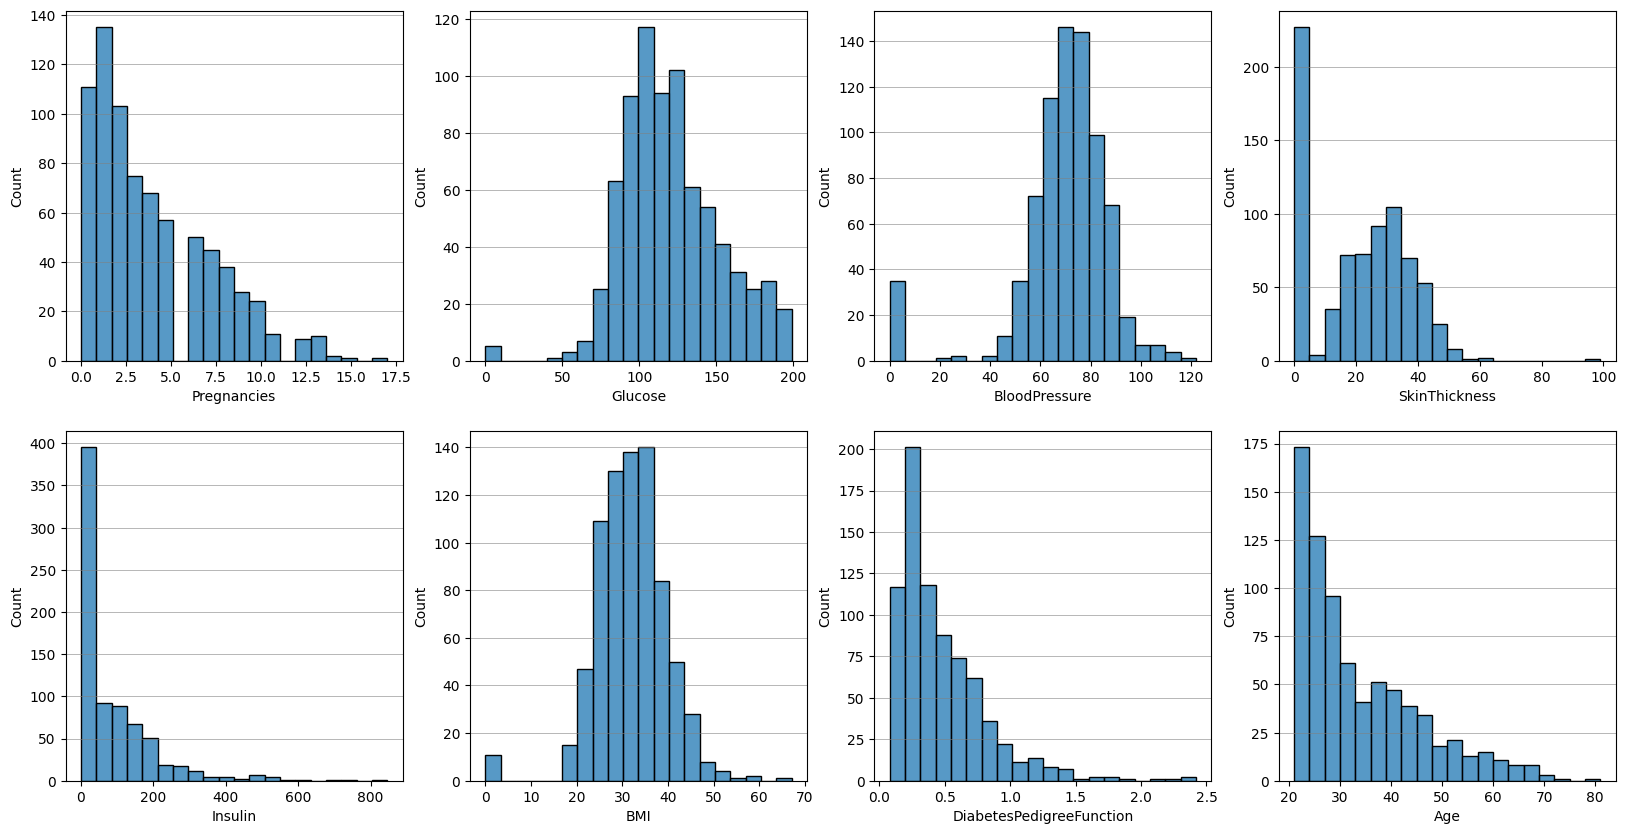

In [6]:
#numerical 
numeric_var = data.select_dtypes(include = ['number']).drop(columns=['Outcome']).corr() # Con esta linea seleccionamos las columnas numericas del dataframe.

def graficar_distribucion_numerica(df, columns):
    
    n = len(columns)
    n_columns = 4  
    n_rows = (n // n_columns) + (n % n_columns > 0)  
    
    fig, axes = plt.subplots(n_rows, n_columns, figsize=(n_columns * 5, n_rows * 5))
    
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        sns.histplot(df[col], bins=20, ax=axes[i])
        axes[i].yaxis.grid(True, color='gray', linewidth=0.4, zorder=0)
    
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')  
    
        plt.tight_layout()
    plt.show()

graficar_distribucion_numerica(data, numeric_var[:-1]) # Indice -1 porque la target esta al final. 

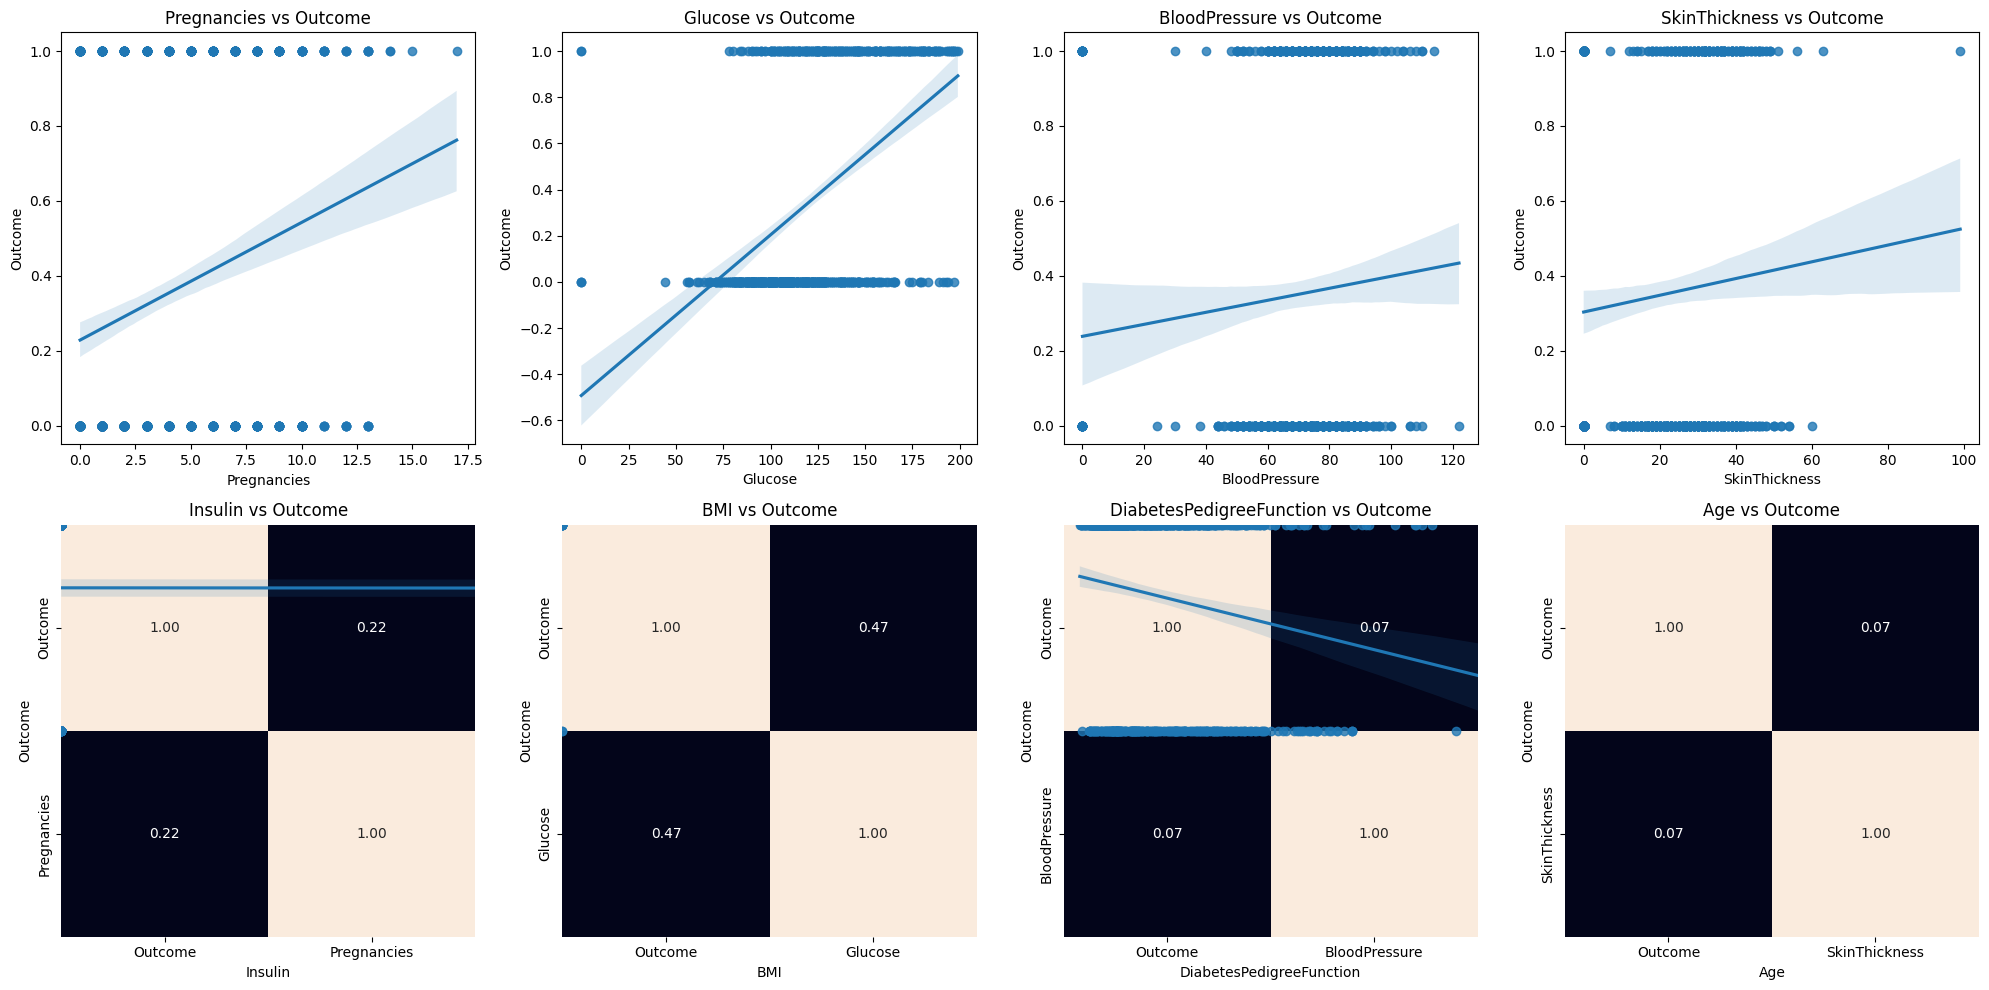

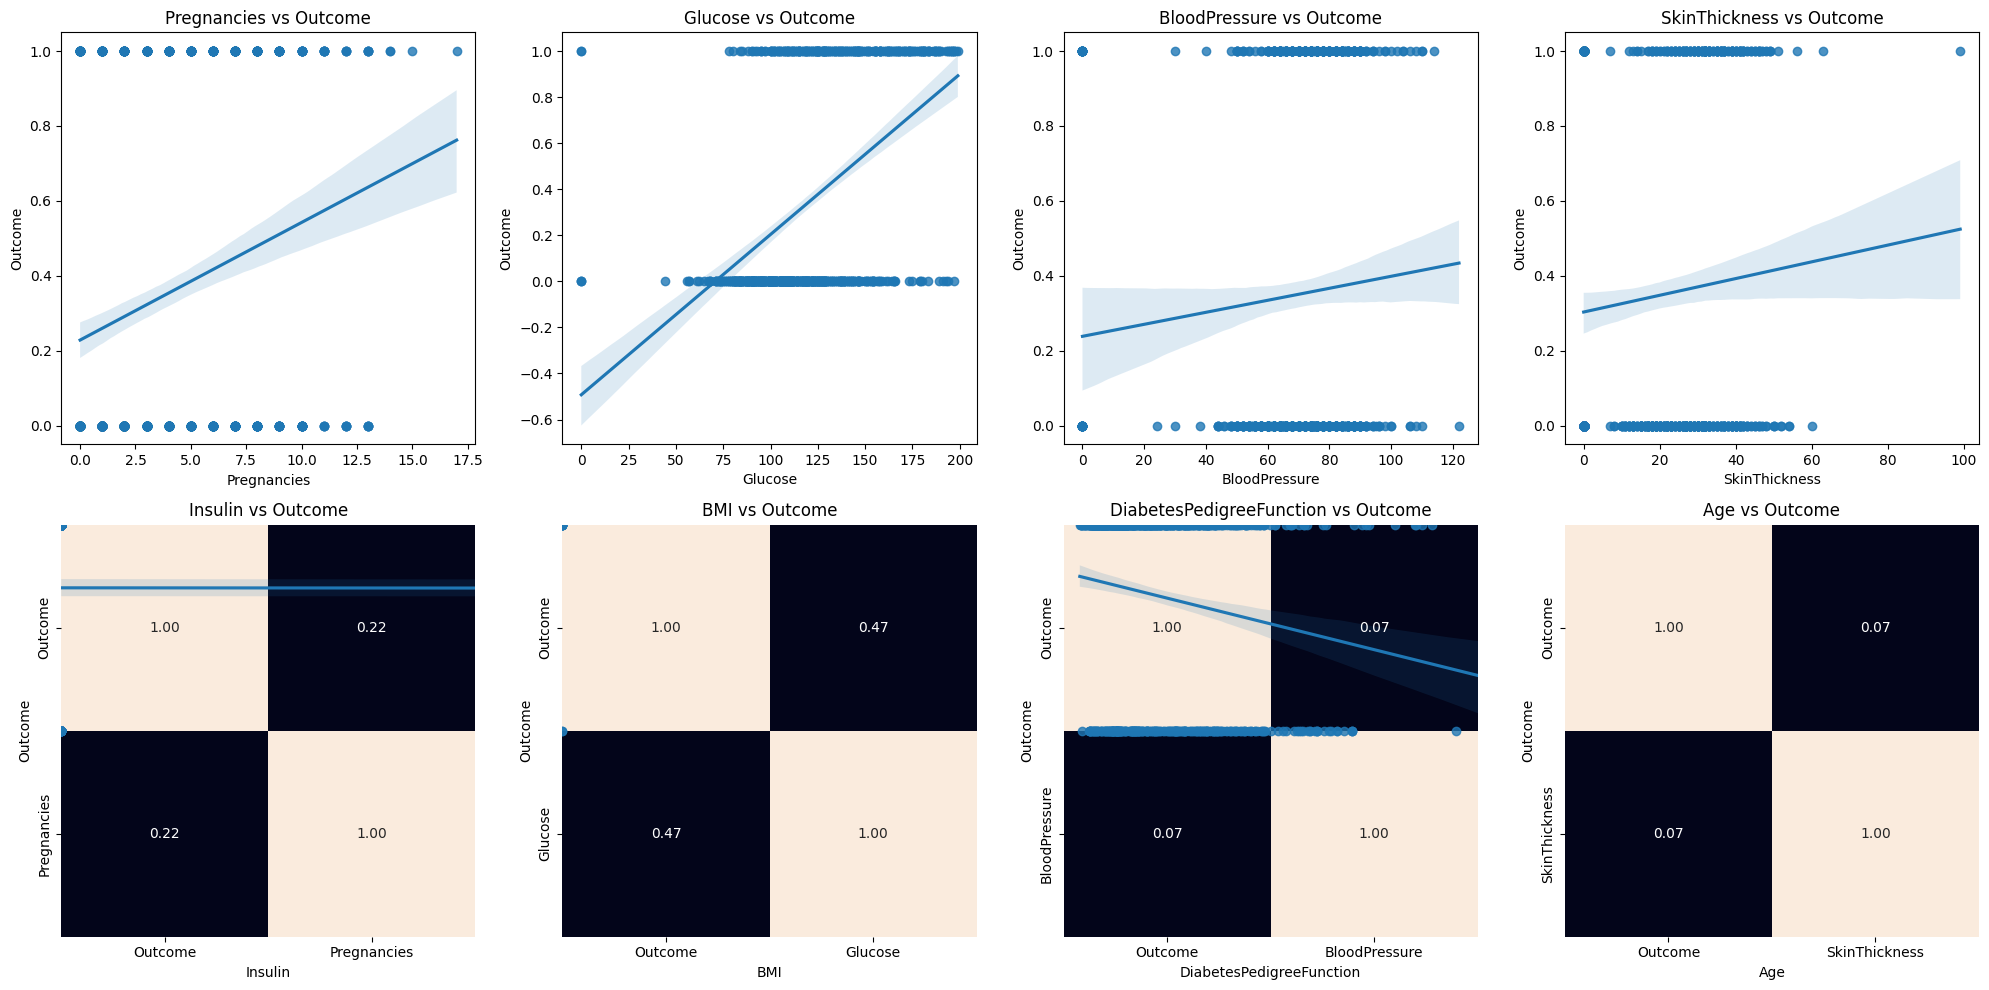

In [7]:
#numeric - numeric

def graficar_dispersiones_y_heatmaps(df, columnas, target_col):
    n = len(columnas)  
    n_columnas = 4 
    n_filas = 2
    
    fig, axis = plt.subplots(n_filas, n_columnas, figsize=(20, 10))
    
    # Aplanar el arreglo de ejes para que sea más fácil acceder a él
    axis = axis.flatten()
    
    # Iterar a través de las columnas para crear los gráficos
    for i, col in enumerate(columnas):
        if i < len(axis):  # Asegurarse de no exceder el número de subgráficas
            sns.regplot(ax=axis[i], data=df, x=col, y=target_col)
            axis[i].set_title(f'{col} vs {target_col}')
        
            # Aquí ajustamos para evitar un índice fuera de rango
            if i + n_columnas < len(axis):
                sns.heatmap(df[[target_col, col]].corr(), annot=True, fmt=".2f", ax=axis[i + n_columnas], cbar=False)
                axis[i + n_columnas].set_title('')
    
    plt.tight_layout()
    plt.show()

graficar_dispersiones_y_heatmaps(data, numeric_var[0:4], "Outcome")
graficar_dispersiones_y_heatmaps(data, numeric_var[4:8], "Outcome")

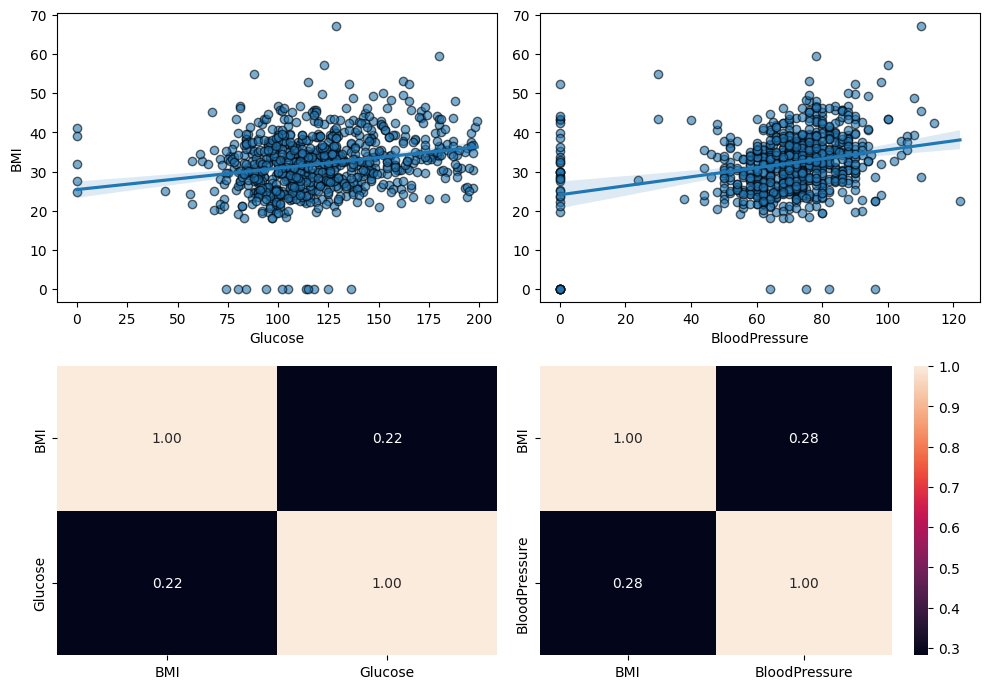

In [8]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))  

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data, x = "Glucose", y = "BMI", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.heatmap(data[["BMI", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data, x = "BloodPressure", y = "BMI", scatter_kws={'edgecolor': 'k', 'alpha': 0.6}).set(ylabel=None)
sns.heatmap(data[["BMI", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()
plt.show()

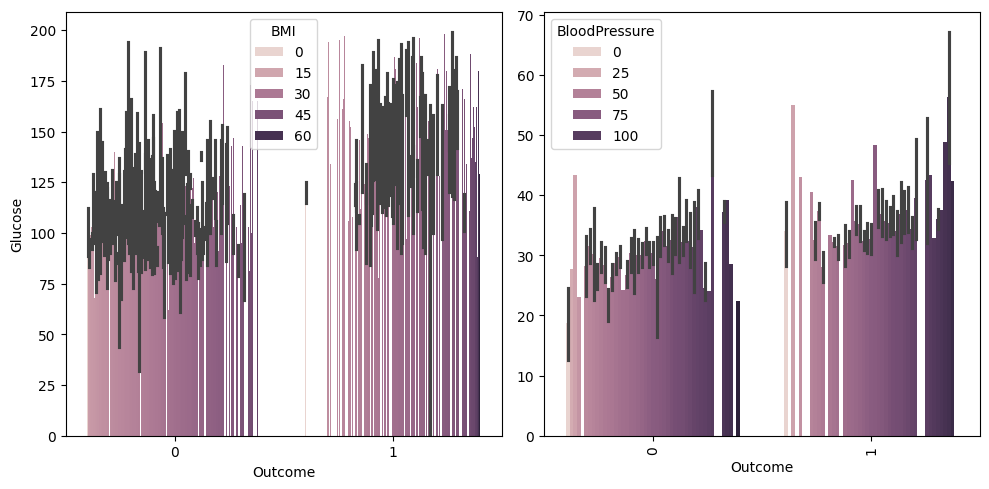

In [9]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = data, x = "Outcome", y = 'Glucose', hue = 'BMI')

sns.barplot(ax = axis[1], data = data, x = "Outcome", y = 'BMI', hue = 'BloodPressure').set(ylabel = None)
for tick in axis[1].get_xticklabels():
    tick.set_rotation(90)

plt.tight_layout()
plt.show()

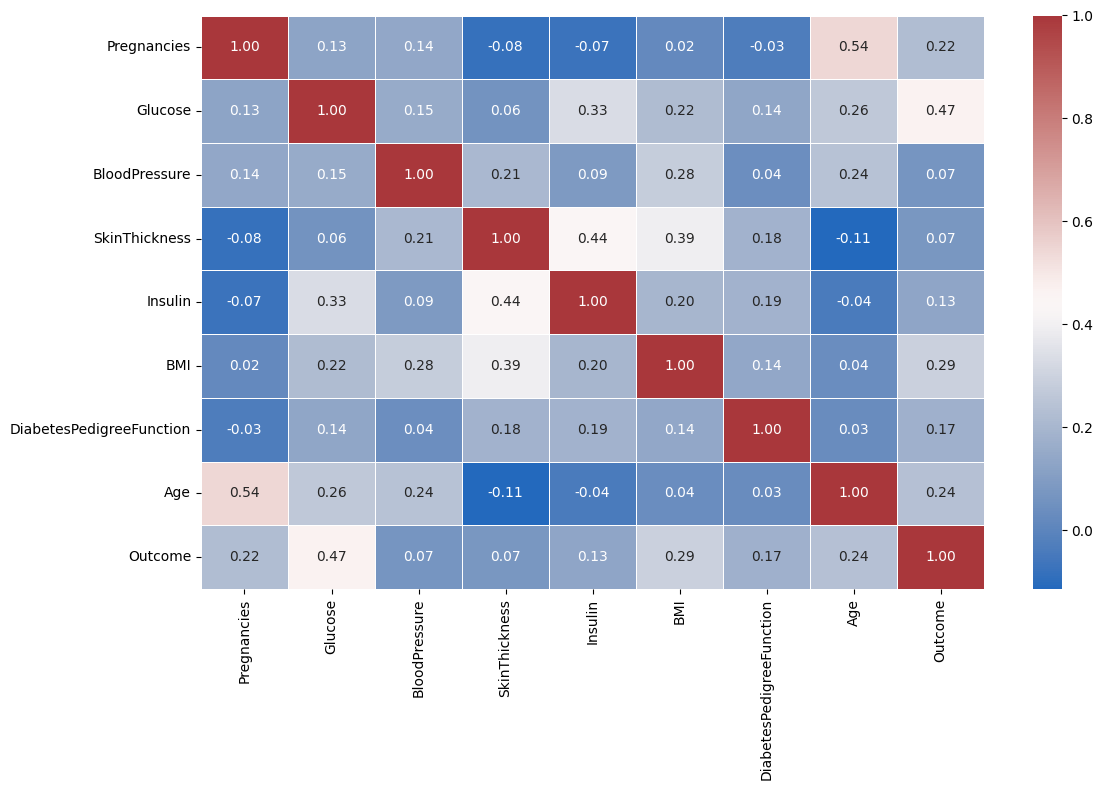

In [10]:
#correlaciones

def plot_matriz_correlacion(data_set):

    corr_matrix = data_set.select_dtypes(include = ['number']).corr() # Con esta linea seleccionamos las columnas numericas del dataframe.

    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot = True, fmt = ".2f", linewidths = 0.5, cmap = "vlag")

    plt.tight_layout()
    plt.show()

plot_matriz_correlacion(data)

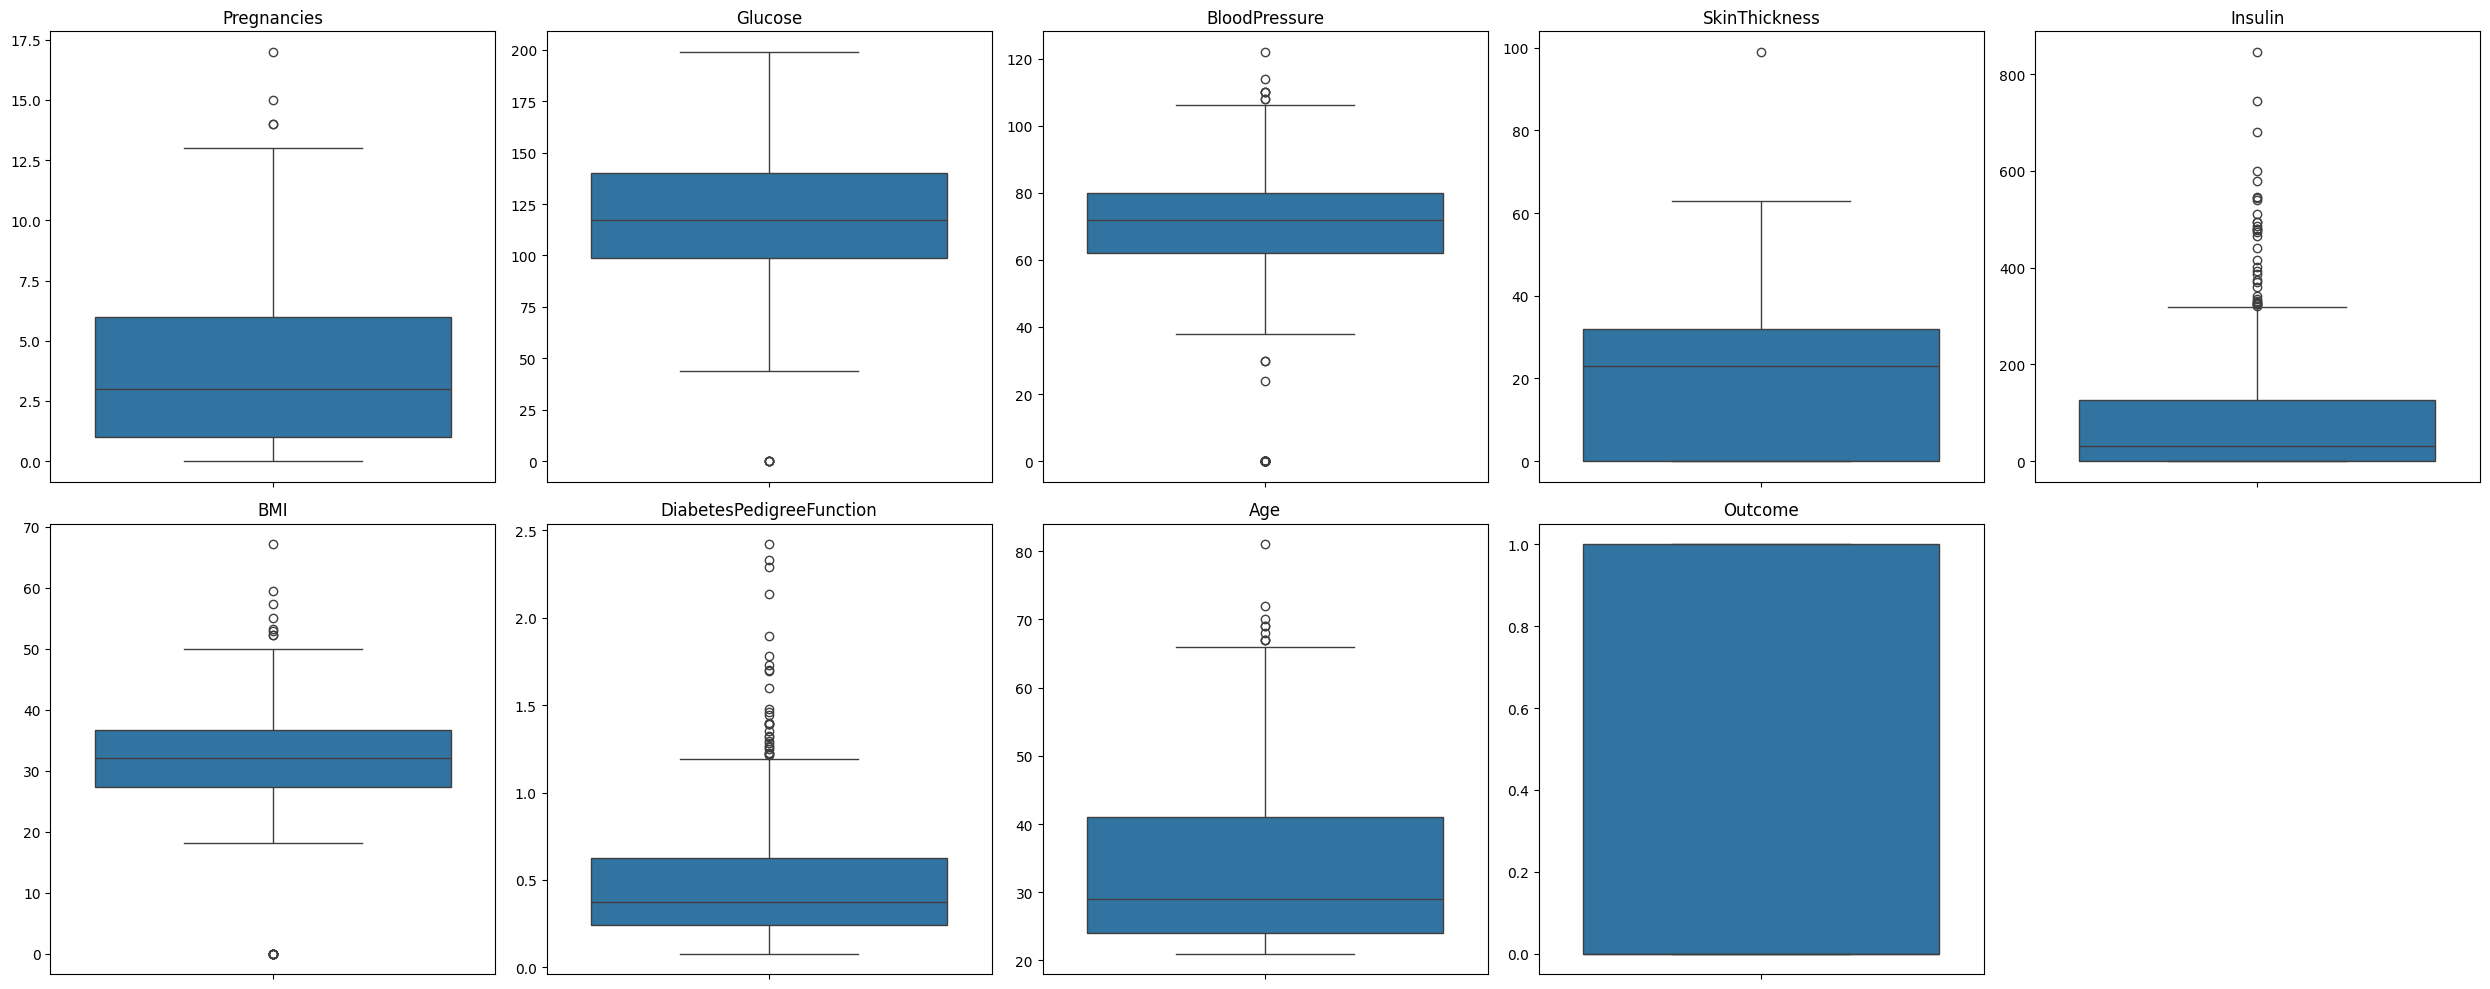

In [11]:
def generar_boxplots_automaticos(df):
   
    # Filtrar las columnas numéricas del DataFrame, como ya esta normalizado, son todas. 
    columnas = df.columns

    n_columnas = 5
    n_filas = (len(columnas) + n_columnas - 1) // n_columnas  # Redondeo hacia arriba

    # Crear la figura y los ejes para los subgráficos
    fig, axis = plt.subplots(n_filas, n_columnas, figsize=(n_columnas * 5, n_filas * 5))

    # Aplanar el array de ejes para facilitar la iteración
    axis = axis.flatten()

    # Graficar un boxplot para cada columna del DataFrame
    for i, col in enumerate(columnas):
        sns.boxplot(ax=axis[i], data=df, y=col)
        axis[i].set_title(col)
        axis[i].set_ylabel('')

    # Si hay menos gráficos que subgráficos, ocultar los ejes restantes
    for j in range(i + 1, len(axis)):
        axis[j].axis('off')

    # Ajustar el layout para evitar que los gráficos se sobrepongan
    plt.tight_layout()
    plt.show()

generar_boxplots_automaticos(data)

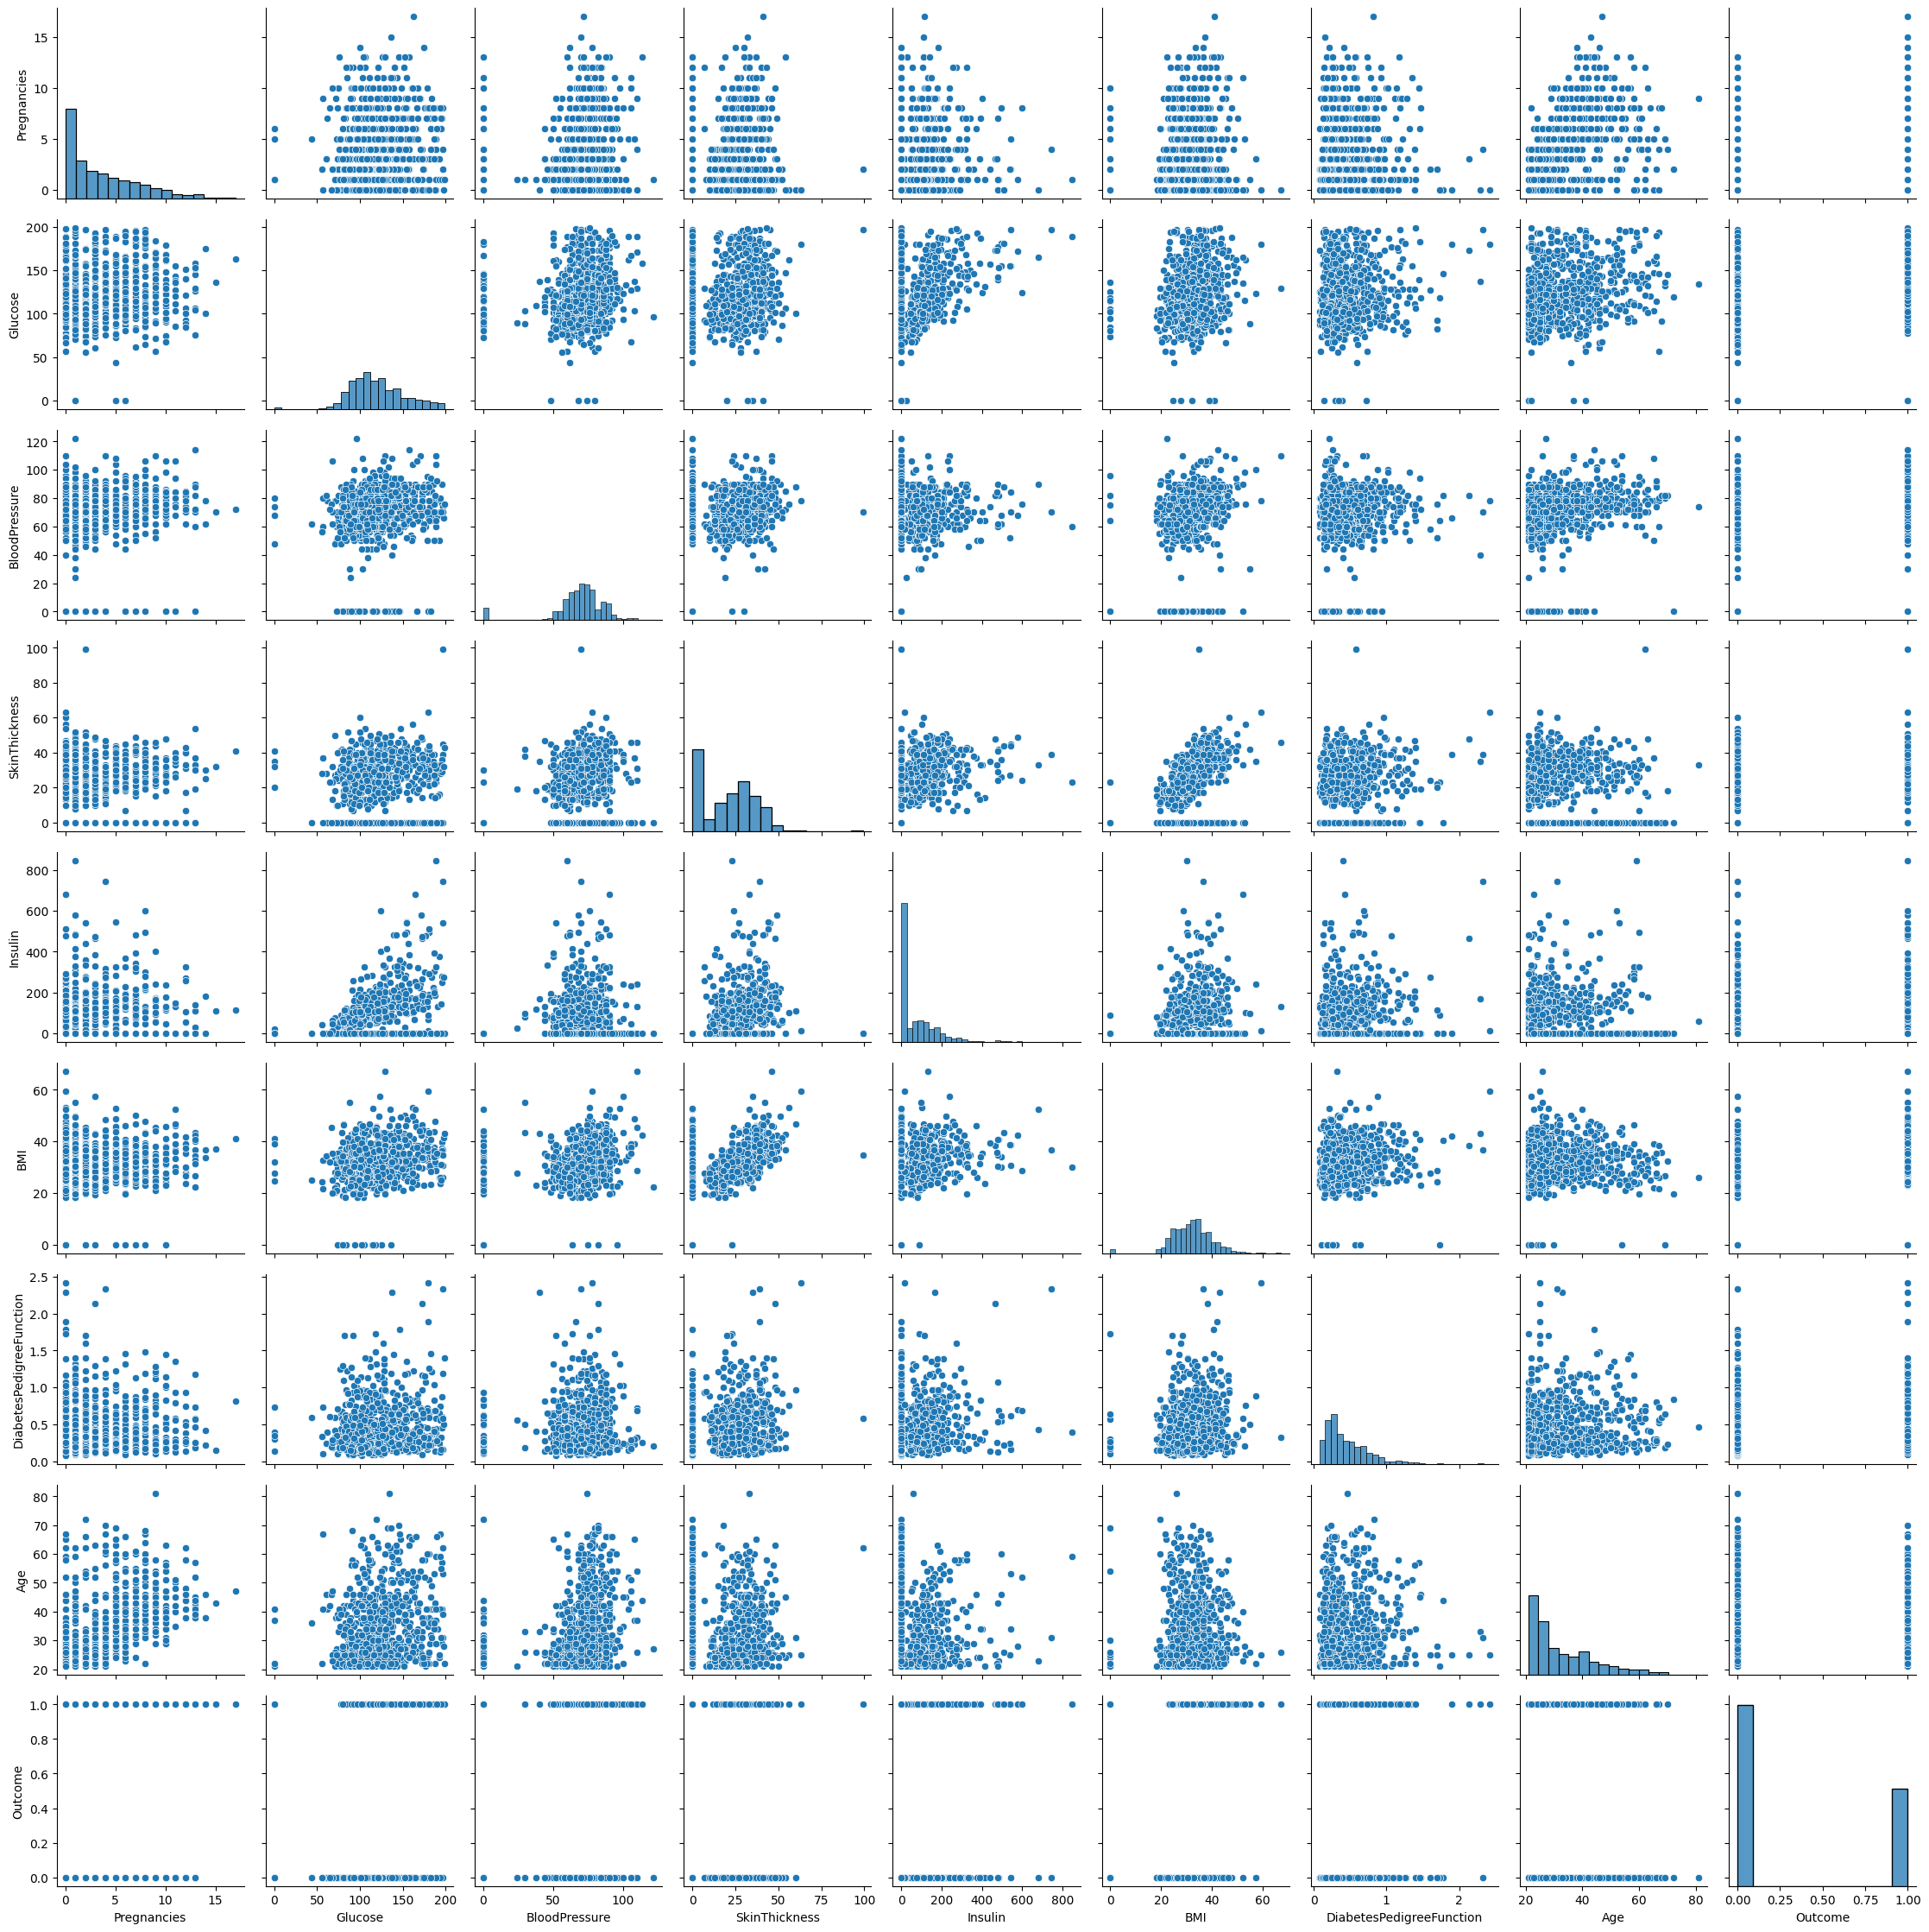

In [12]:
# graficar el pairplot.

sns.pairplot(data = data)

plt.tight_layout()
plt.show()

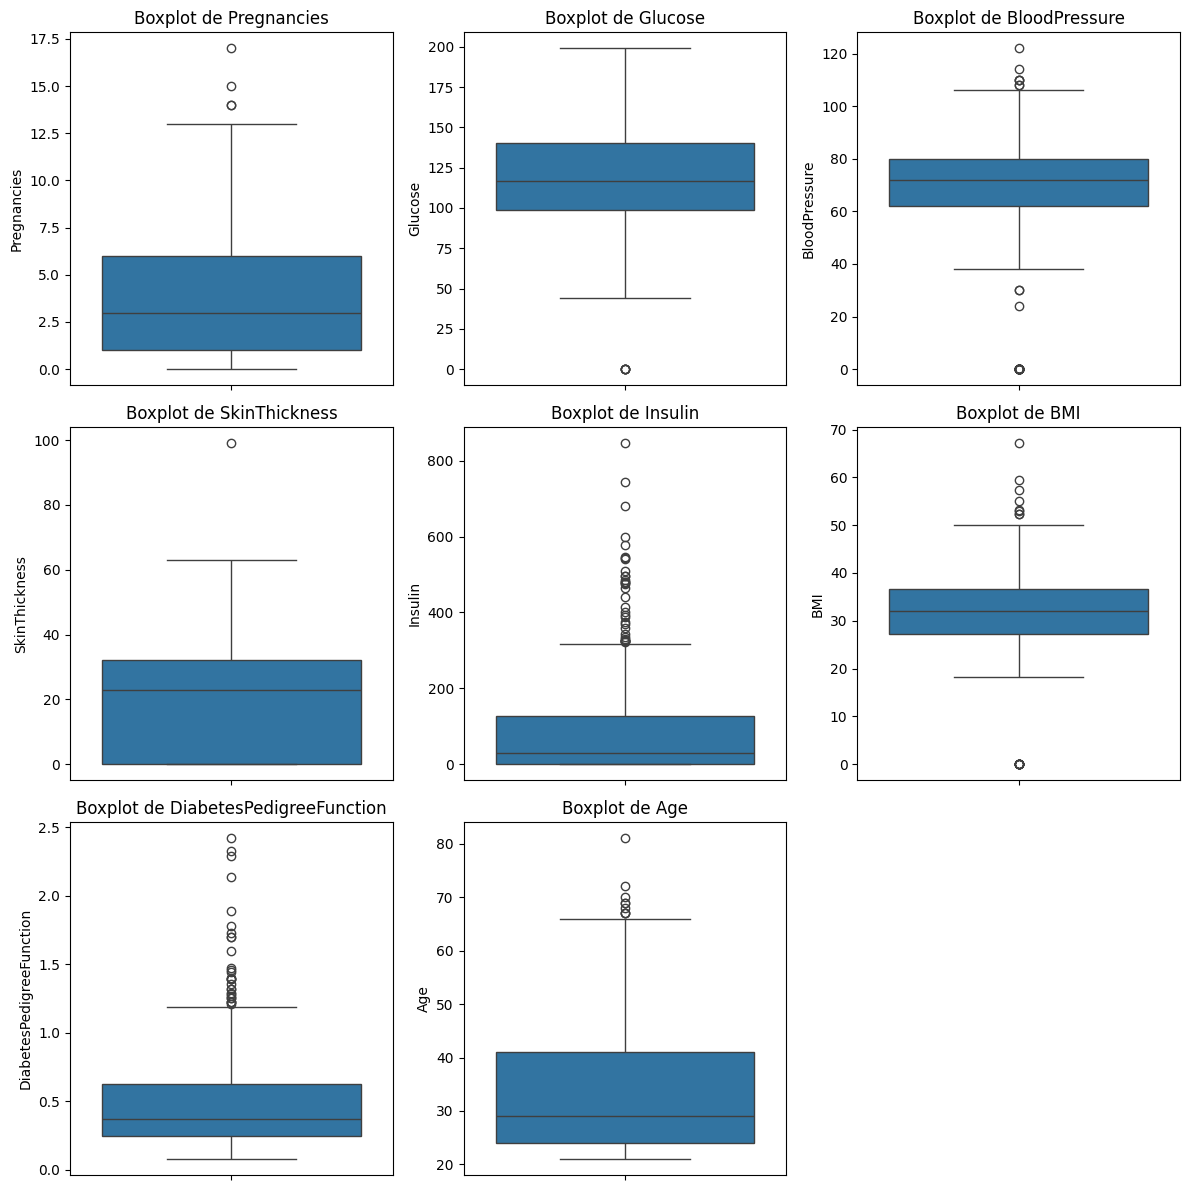

In [13]:
def plot_boxplots_numericos(data_set):
    # Filtrar las columnas numéricas, excluyendo 'Outcome' si está presente
    column_filter_numericas = data_set.select_dtypes(include='number').drop(columns=['Outcome'], errors='ignore').columns
    
    ncols = 3
    nrows = (len(column_filter_numericas) + ncols - 1) // ncols  # Esto asegura que haya suficientes filas para 3 columnas

    # Crear la figura y los ejes para las subgráficas con 3 columnas
    fig, axis = plt.subplots(nrows, ncols, figsize=(12, nrows * 4))  # Ajusta el tamaño de la figura según el número de filas

    axis = axis.flatten() # Si solo hay una fila o una columna, aseguramos que 'axis' sea un array unidimensional

    for i, columna in enumerate(column_filter_numericas):    # Generar los boxplots para cada columna numérica
        sns.boxplot(ax=axis[i], data=data_set, y=columna)
        axis[i].set_title(f'Boxplot de {columna}')

    for j in range(i + 1, len(axis)):  # Eliminar los subgráficos vacíos si hay menos columnas que subgráficas
        axis[j].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_boxplots_numericos(data)

In [14]:
data_limpia_con_outliers = data.copy()
data_limpia_sin_outliers = data.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = 0
  
  # Replace upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Replace lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)

  return df.copy(), [lower_limit, upper_limit]


# Crear diccionario con los limites de outliers para poder guardarlos y a la vez llamar a la funcion para que convierta la copia del 
# dataframe a sin outliers y tener las dos variables con cada dataframe (el con y el sin) disponibles para los siguientes pasos. 

outliers_dict = {}

for column in ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age'	]: # RECORDAR CAMBIAR LAS COLUMNAS. 
  data_limpia_sin_outliers, limits_list = replace_outliers_from_column(column, data_limpia_sin_outliers)
  outliers_dict[column] = limits_list

# Guardar el diccionario en un archivo json.  

with open("../models/outliers_replacement.json", "w") as f:
  json.dump(outliers_dict, f)

outliers_dict

{'Pregnancies': [0, np.float64(13.5)],
 'Glucose': [np.float64(37.125), np.float64(202.125)],
 'BloodPressure': [np.float64(35.0), np.float64(107.0)],
 'SkinThickness': [0, np.float64(80.0)],
 'Insulin': [0, np.float64(318.125)],
 'BMI': [np.float64(13.35), np.float64(50.550000000000004)],
 'DiabetesPedigreeFunction': [0, np.float64(1.2)],
 'Age': [0, np.float64(66.5)]}

In [15]:
data_limpia_con_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
data_limpia_sin_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
# Escalado de valores:

# Separar 'x_con_outliers' y 'x_sin_outliers' e 'Y' en train y test. (resultante 6 excels). 

num_variables = data.select_dtypes(include = 'number').drop(columns = ['Outcome'], errors='ignore').columns # Si quiero eliminar alguna columna rellenar la parte de drop.

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = data_limpia_con_outliers.drop("Outcome", axis = 1)[num_variables]
X_sin_outliers = data_limpia_sin_outliers.drop("Outcome", axis = 1)[num_variables]
y = data_limpia_con_outliers["Outcome"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 95)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 95)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("../data/processed/Excels/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/Excels/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("../data/processed/Excels/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/Excels/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("../data/processed/Excels/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/Excels/y_test.xlsx", index = False)

X_train_con_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
448,0,104,64,37,64,33.6,0.510,22
647,0,179,50,36,159,37.8,0.455,22
365,5,99,54,28,83,34.0,0.499,30
752,3,108,62,24,0,26.0,0.223,25
446,1,100,72,12,70,25.3,0.658,28


In [18]:
# Normalización:

from sklearn.preprocessing import StandardScaler
import pickle

num_variables = data.select_dtypes(include = 'number').drop(columns = ['Outcome'], errors='ignore').columns # Si quiero eliminar alguna columna rellenar la parte de drop.

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)   

with open("../models/normalizador_con_outliers.pkl", "wb") as file: # Guardar el Normalizador. 
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("../data/processed/Excels/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/Excels/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

            #/workspaces/Machine-Learning-Diabetes/models/outliers_replacement.json
with open("../models/normalizador_sin_outliers.pkl", "wb") as file: # Guardar el Normalizador. 
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("../data/processed/Excels/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/Excels/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
448,-1.148613,-0.534527,-0.260592,1.047220,-0.126456,0.221288,0.140735,-0.952638
647,-1.148613,1.865293,-0.980634,0.984708,0.717985,0.761020,-0.033526,-0.952638
365,0.339253,-0.694514,-0.774907,0.484617,0.042432,0.272691,0.105883,-0.274765
752,-0.255893,-0.406536,-0.363455,0.234571,-0.695343,-0.755369,-0.768592,-0.698436
446,-0.851040,-0.662517,0.150860,-0.515567,-0.073123,-0.845324,0.609657,-0.444233


In [19]:
# Escalado Mínimo-Máximo:

from sklearn.preprocessing import MinMaxScaler

# Filtrar las columnas numéricas del dataset, excluyendo 'Outcome'
num_variables = data.select_dtypes(include='number').drop(columns=['Outcome'], errors='ignore').columns

### ESCALAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

# Guardar el MinMaxScaler con outliers
with open("../models/scaler_con_outliers.pkl", "wb") as file:  # Guardar el Escalador
    pickle.dump(scaler_con_outliers, file)

# Aplicar la transformación al conjunto de entrenamiento con outliers
X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index=X_train_con_outliers.index, columns=num_variables)

# Aplicar la transformación al conjunto de prueba con outliers
X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index=X_test_con_outliers.index, columns=num_variables)

# Guardar los datasets escalados
X_train_con_outliers_scal.to_excel("../data/processed/Excels/X_train_con_outliers_scal.xlsx", index=False)
X_test_con_outliers_scal.to_excel("../data/processed/Excels/X_test_con_outliers_scal.xlsx", index=False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

# Guardar el MinMaxScaler sin outliers
with open("../models/scaler_sin_outliers.pkl", "wb") as file:  # Guardar el Escalador
    pickle.dump(scaler_sin_outliers, file)

# Aplicar la transformación al conjunto de entrenamiento sin outliers
X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index=X_train_sin_outliers.index, columns=num_variables)

# Aplicar la transformación al conjunto de prueba sin outliers
X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index=X_test_sin_outliers.index, columns=num_variables)

# Guardar los datasets escalados sin outliers
X_train_sin_outliers_scal.to_excel("../data/processed/Excels/X_train_sin_outliers_scal.xlsx", index=False)
X_test_sin_outliers_scal.to_excel("../data/processed/Excels/X_test_sin_outliers_scal.xlsx", index=False)

# Mostrar las primeras filas del conjunto de entrenamiento con outliers escalado
X_train_con_outliers_scal.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
448,0.000000,0.522613,0.524590,0.373737,0.075650,0.500745,0.184458,0.019608
647,0.000000,0.899497,0.409836,0.363636,0.187943,0.563338,0.160974,0.019608
365,0.294118,0.497487,0.442623,0.282828,0.098109,0.506706,0.179761,0.176471
752,0.176471,0.542714,0.508197,0.242424,0.000000,0.387481,0.061913,0.078431
446,0.058824,0.502513,0.590164,0.121212,0.082742,0.377049,0.247652,0.137255


In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 4 decimos implícitamente que queremos eliminar 1 característica del conjunto de datos.

selection_model = SelectKBest(f_classif, k=4)
selection_model.fit(X_train_con_outliers, y_train)

# Obtener las características seleccionadas
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers), columns=X_train_con_outliers.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers), columns=X_test_con_outliers.columns.values[ix])

# Guardar las columnas seleccionadas en un archivo JSON
columns_list = X_train_sel.columns.tolist()  # Convierte el objeto Index a una lista

# Guardar las columnas seleccionadas
with open("../models/feature_selection_k_4.json", "w") as f:  # Guardar la lista de columnas seleccionadas
    json.dump(columns_list, f)

X_train_sel.head()

# GUARDAR LOS DATASETS
X_train_sel.to_excel("../data/processed/Excels/X_train_sel_k4.xlsx", index=False)
X_test_sel.to_excel("../data/processed/Excels/X_test_sel_k4.xlsx", index=False)

#remove canals2